# **Desvendando os Mercados de Matérias-Primas Agrícolas: Uma Análise Profunda de Preços e Variações**

Vamos compreender a dinâmica dos preços das matérias-primas agrícolas é crucial para investidores, produtores e formuladores de políticas. Este notebook explora tendências, correlações e padrões de variação para fornecer insights valiosos sobre este mercado volátil. Analisaremos um conjunto de dados abrangente que detalha os preços e as variações percentuais de diversas matérias-primas agrícolas ao longo do tempo."


In [79]:
# Importando os pacotes necessários para análise e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Configurações de estilo para visualizações mais atraentes

sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 14

matplotlib.rcParams['figure.figsize'] = (12, 7) # Tamanho padrão para figuras
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Carregando e Explorando o Conjunto de Dados**

"Vamos carregar o conjunto de dados de matérias-primas agrícolas em um DataFrame do Pandas e realizar uma exploração inicial para entender sua estrutura e conteúdo."


In [80]:
# Carregando o arquivo CSV para um DataFrame do Pandas

df = pd.read_csv('agricultural_raw_material.csv')

### **Visão Geral dos Dados**

"As primeiras linhas do DataFrame nos dão um vislumbre da estrutura dos dados, enquanto `df.info()` e `df.describe()` confirmam os tipos de dados, a presença de valores não nulos e fornecem um resumo estatístico das colunas numéricas."


In [81]:
# Exibindo as primeiras 5 linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
display(df.head())


# Obtendo informações concisas sobre o DataFrame, incluindo tipos de dados e valores não nulos

print("Informações do DataFrame (df.info()):")
df.info()

# Gerando estatísticas descritivas para as colunas numéricas
print("Estatísticas Descritivas do DataFrame (df.describe()):")
display(df.describe())

Primeiras 5 linhas do DataFrame:


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


Informações do DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Chan

,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


### **Verificação de Valores Nulos**

"É crucial verificar a presença de valores nulos em cada coluna, pois eles podem impactar a qualidade e a precisão da nossa análise. A seguir, identificamos a contagem de valores nulos por coluna."



In [82]:
# Verificando a contagem de valores nulos em cada coluna

print("Contagem de Valores Nulos por Coluna:")

df.isnull().sum()


Contagem de Valores Nulos por Coluna:


,0
Month,0
Coarse wool Price,34
Coarse wool price % Change,34
Copra Price,22
Copra price % Change,22
Cotton Price,0
Cotton price % Change,0
Fine wool Price,34
Fine wool price % Change,34
Hard log Price,0


## **Tratamento de Dados Ausentes, Incorretos e Inválidos**


"Para garantir a integridade e a precisão da análise, é fundamental limpar os dados. Isso inclui remover caracteres indesejados, substituir valores inválidos e lidar com as linhas que contêm informações ausentes. Optamos por remover as linhas com valores ausentes para garantir a integridade da análise, embora isso possa resultar na perda de algumas observações."

In [83]:
# Removendo caracteres '%', ',' e '-' das colunas, que impedem a conversão para tipo numérico.

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)

# Substituindo strings vazias e o valor 'MAY90' por NaN, para que possam ser tratados como valores ausentes.
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Removendo todas as linhas que contêm qualquer valor NaN após as substituições.

df = df.dropna()

# Verificando novamente a contagem de valores nulos para confirmar que foram todos resolvidos.

print("Contagem de Valores Nulos após o Tratamento:")

display(df.isnull().sum())

# Lista de colunas que precisam ser convertidas para o tipo float.

columns_to_float = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change", "Fine wool Price", "Fine wool price % Change", "Hard log price % Change"
"Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change","Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change","Wood pulp price % Change", "Cotton Price", "Hard log Price", "Plywood Price", "Rubber Price","Softlog Price", "Soft sawnwood Price", "Wood pulp Price", "Hide Price"
]

# Convertendo os tipos de dados das colunas especificadas para float.

for col in columns_to_float:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificando os tipos de dados após a conversão para confirmar as alterações.

print("Tipos de Dados após a Conversão para Float:")

display(df.dtypes)


Contagem de Valores Nulos após o Tratamento:


,0
Month,0
Coarse wool Price,0
Coarse wool price % Change,0
Copra Price,0
Copra price % Change,0
Cotton Price,0
Cotton price % Change,0
Fine wool Price,0
Fine wool price % Change,0
Hard log Price,0


Tipos de Dados após a Conversão para Float:


,0
Month,object
Coarse wool Price,float64
Coarse wool price % Change,float64
Copra Price,float64
Copra price % Change,float64
Cotton Price,float64
Cotton price % Change,float64
Fine wool Price,float64
Fine wool price % Change,float64
Hard log Price,float64


### **Formatação da Coluna de Data e Hora**

"A conversão da coluna 'Month' para o formato de data e hora e sua definição como índice nos permite realizar análises de séries temporais, identificar tendências sazonais e visualizar a evolução dos preços ao longo do tempo."


In [84]:
# Convertendo a coluna 'Month' para o formato datetime. O formato '%b%y' é usado para meses abreviados (ex: 'MAY') e ano com dois dígitos (ex: '90')
df['Month'] = pd.to_datetime(df['Month'].str.upper(), format='%b%y', yearfirst=False)

# Definindo a coluna 'Month' como o índice do DataFrame, o que é essencial para análises de séries temporais.\n",
df = df.set_index('Month')


In [85]:
# Exibindo as primeiras linhas do DataFrame após a formatação da coluna de data e hora e definição do índice.\n",
print("DataFrame após formatação da coluna 'Month' como índice:")

display(df.head())

DataFrame após formatação da coluna 'Month' como índice:


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


## **Análise Exploratória e Visualização (EDA)**

Agora que os dados estão limpos e formatados, podemos iniciar a fase de análise exploratória e visualização. Isso nos permitirá descobrir padrões, tendências e correlações entre as diferentes matérias-primas agrícolas."


### **Mapa de Calor de Correlação de Preços**

"O mapa de calor abaixo mostra a correlação entre os preços das matérias-primas. Valores próximos a 1 (cores mais quentes) indicam uma forte correlação positiva, significando que os preços tendem a se mover na mesma direção. Valores próximos a -1 (cores mais frias) indicam uma forte correlação negativa, enquanto valores próximos a 0 (cores neutras) sugerem pouca ou nenhuma relação linear. Isso pode nos ajudar a identificar grupos de matérias-primas que se comportam de forma semelhante no mercado."


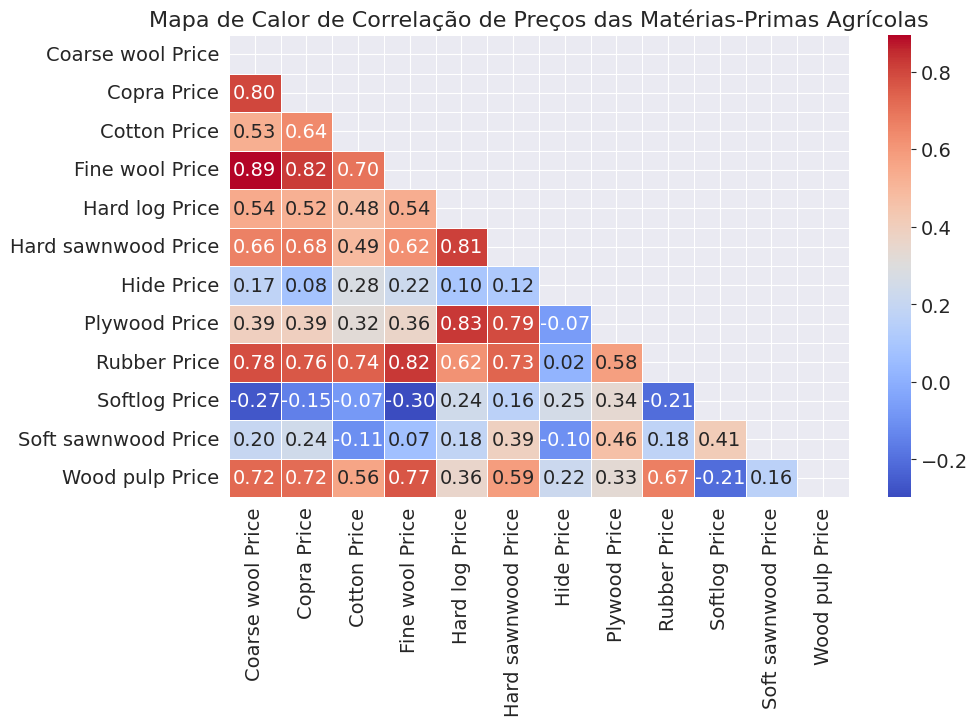

In [86]:
# Lista das colunas de preços das matérias-primas

raw_data_prices = [
'Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price',
'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price',
'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price',
]

# Calculando a matriz de correlação para os preços

corrmat_prices = df[raw_data_prices].corr()

# Configurando o tamanho da figura para o mapa de calor

plt.figure(figsize=(10, 6))

# Criando uma máscara para ocultar a parte superior do triângulo da matriz, pois é simétrica (repetitiva)

mask_prices = np.triu(np.ones_like(corrmat_prices, dtype=bool))

# Gerando o mapa de calor com anotações e a máscara

sns.heatmap(corrmat_prices, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask_prices)
plt.title('Mapa de Calor de Correlação de Preços das Matérias-Primas Agrícolas', fontsize=16)

plt.show()


**Lã grossa:**

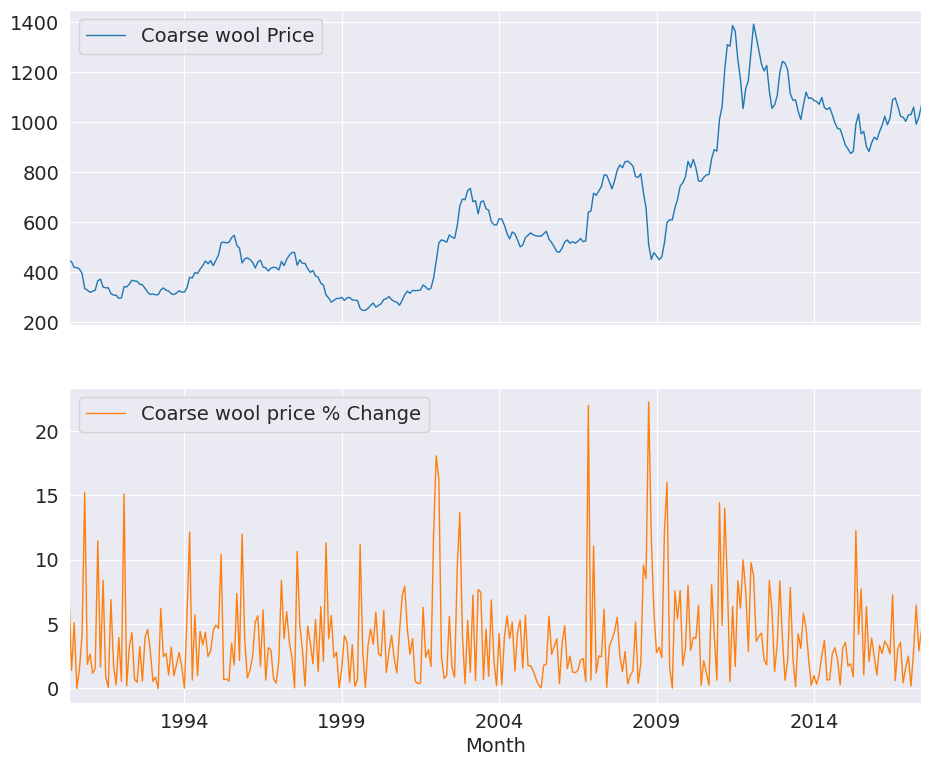

In [87]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

* Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

##Fazendo e respondendo perguntas##
**Q1: Descubra a variação normal do preço de cada matéria-prima**

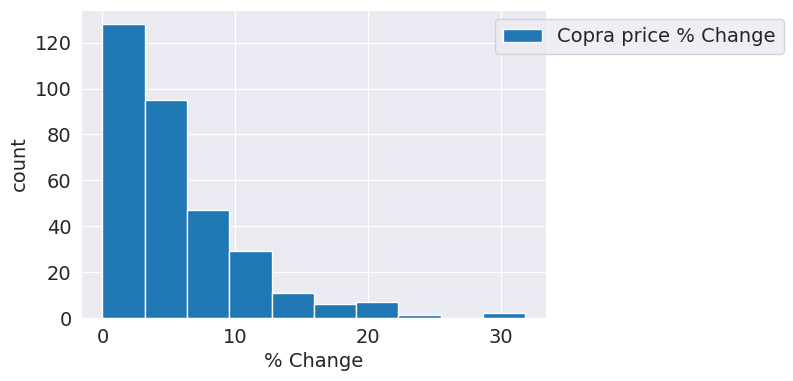

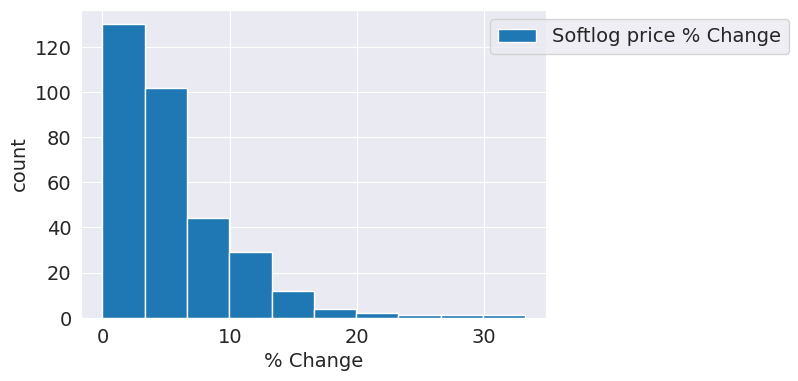

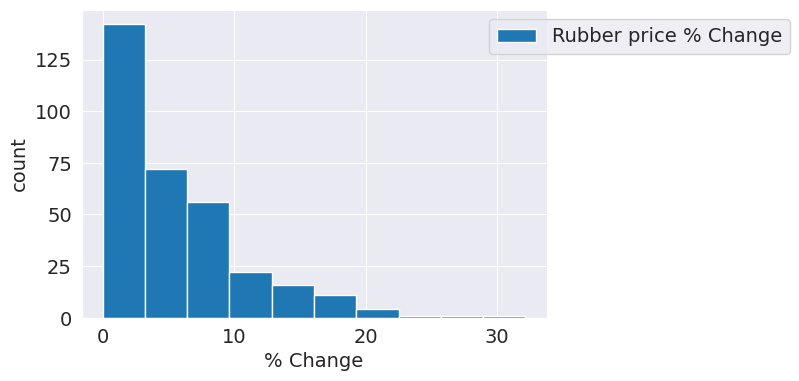

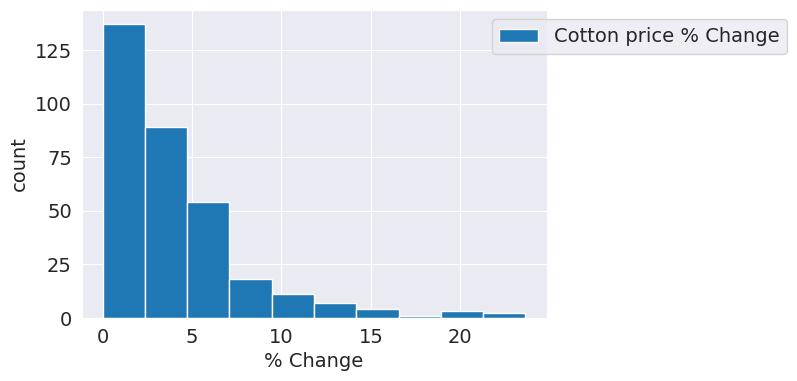

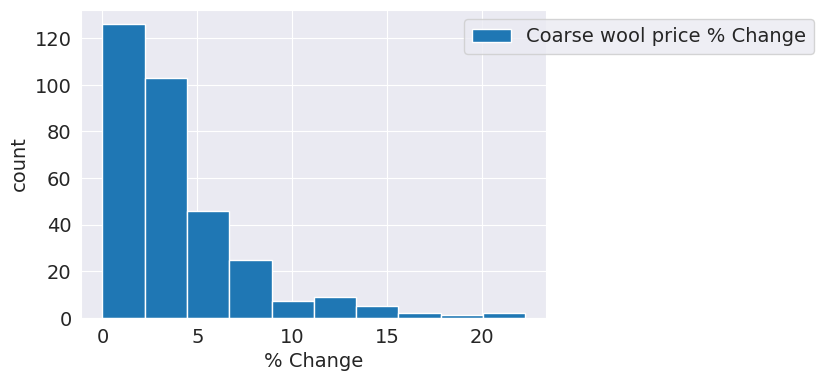

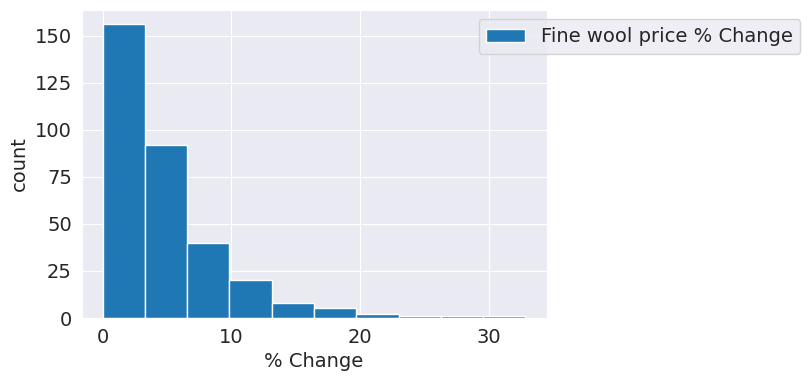

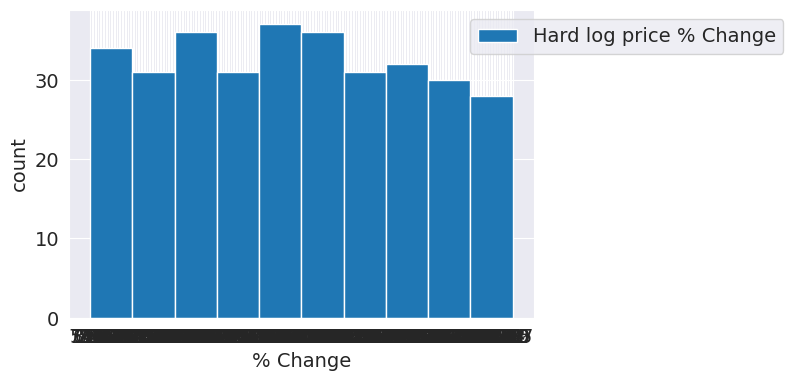

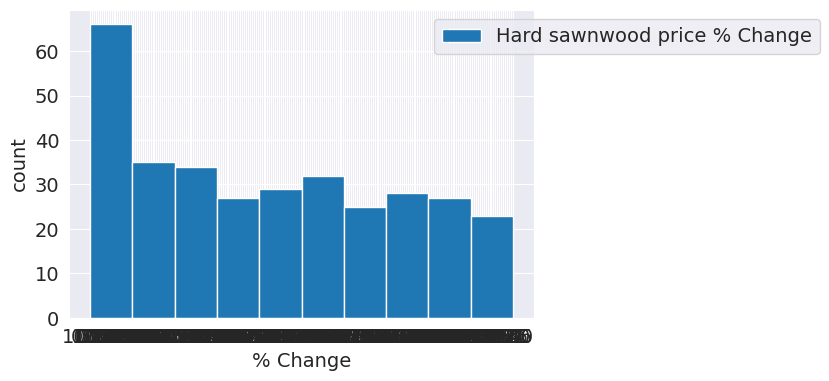

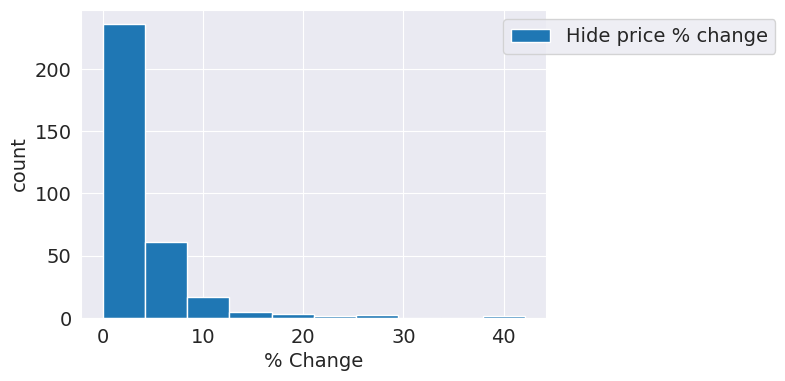

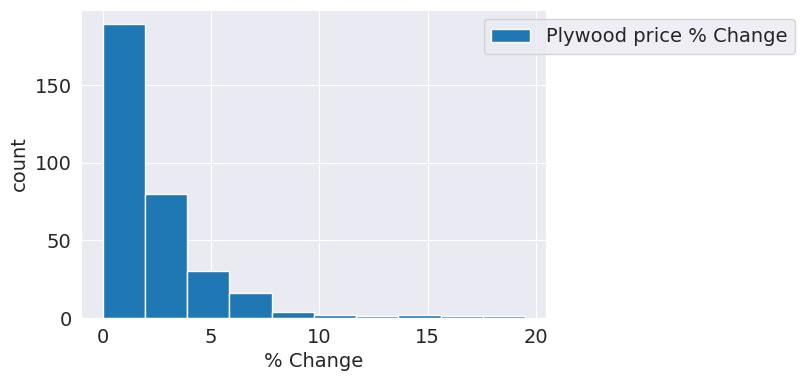

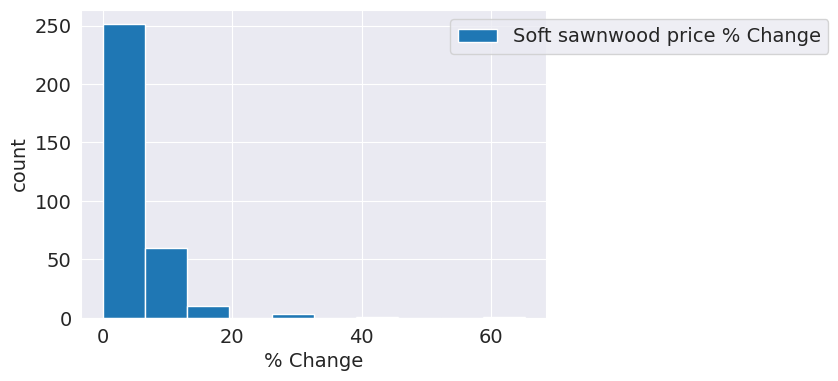

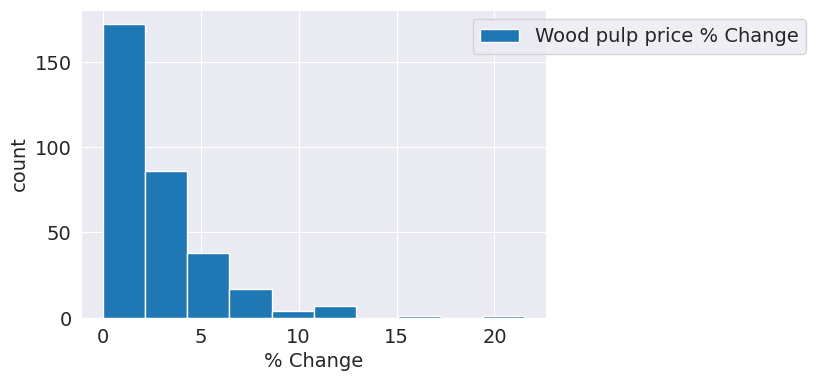

In [88]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)

changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(8,8))
    df[changelist[i]].hist(figsize=(6, 4), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

* Podemos observar que a maioria das matérias-primas tem uma porcentagem de mudança frequente ideal inferior a 10%.
* E ainda tem algumas como a Polpa de Madeira, Madeira compensada e a Lã grossa que tem uma porcentagem de mudança inferior a 5%.


**Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos**

Text(0.5, 0.98, 'Comparação de preços de matérias-primas')

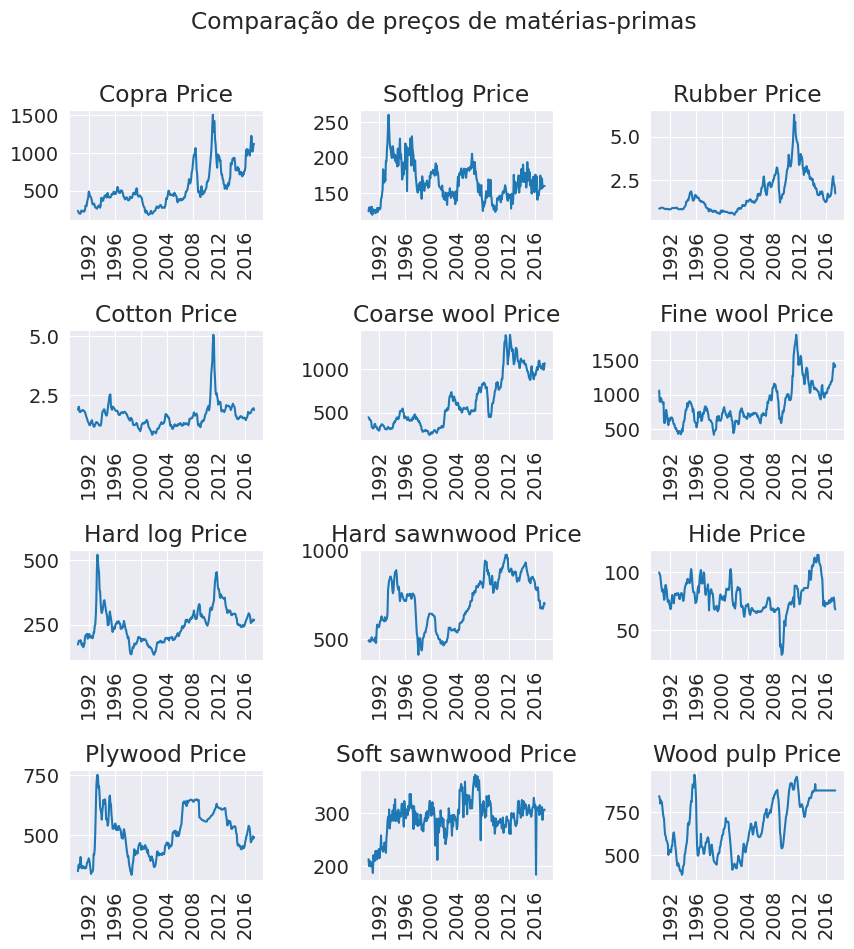

In [89]:
plt.figure(figsize=(10, 10))
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação de preços de matérias-primas")

* Podemos ver que o Algodão e a Borracha são de preços mais baixos

**Vamos comparar preços para entender melhor qual é o mais baixo:**

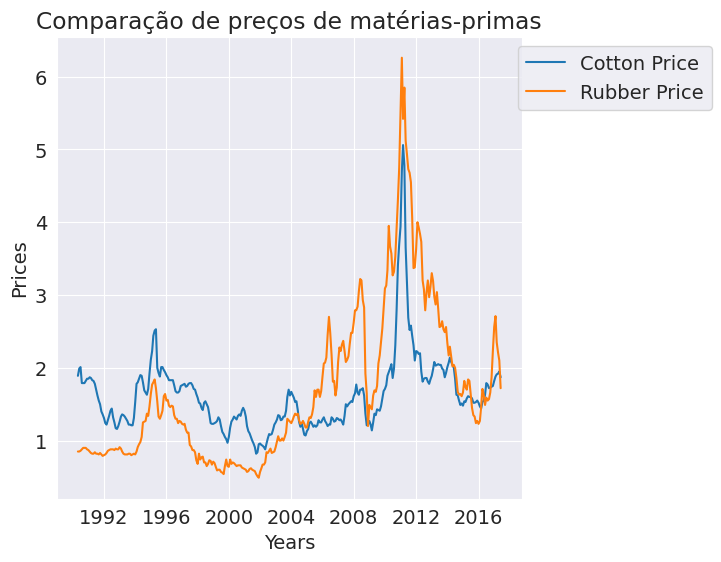

In [90]:
plt.figure(figsize=(6, 6))
plt.plot(df[['Cotton Price','Rubber Price']])
plt.title("Comparação de preços de matérias-primas")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

* **Algodão** é matéria-prima de menor preço nos últimos anos

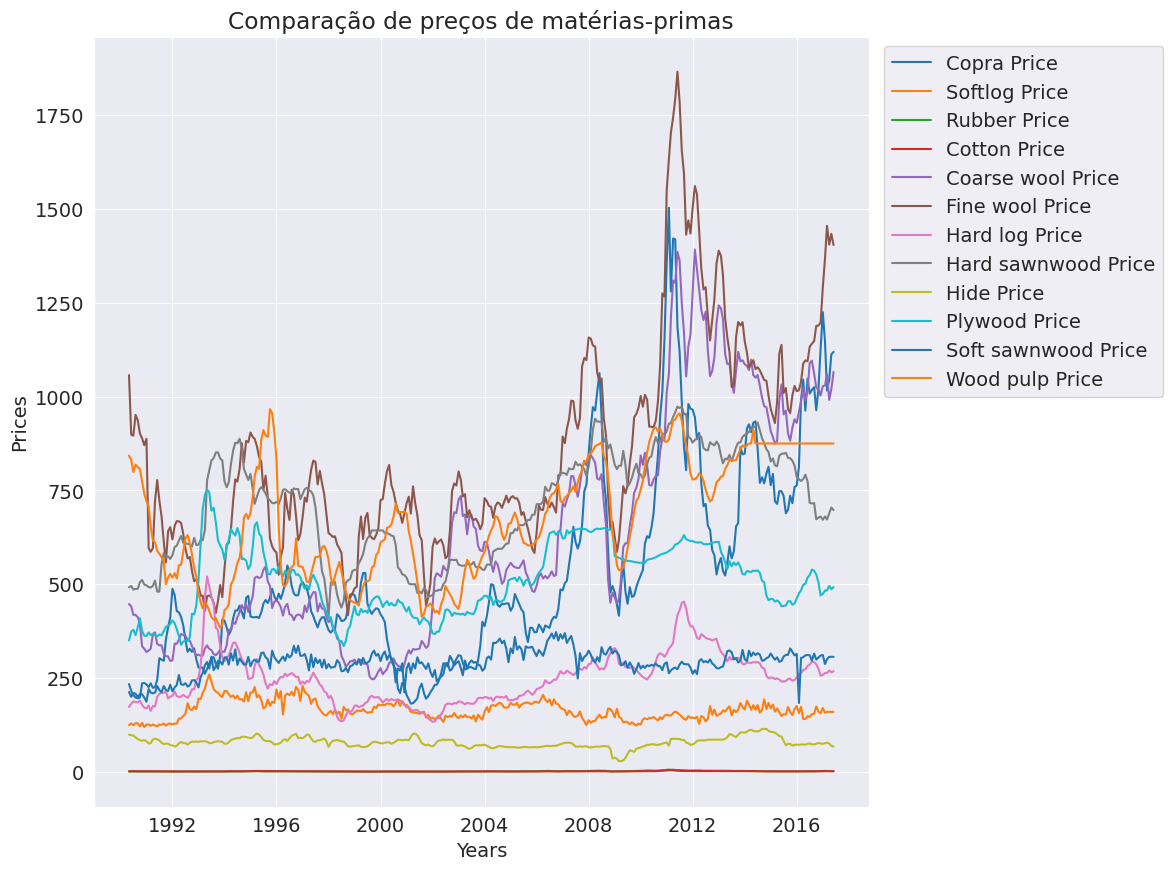

In [91]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Comparação de preços de matérias-primas")
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

A partir dos gráficos pudemos analisar as matérias-primas em tipos de acordo com seu preço ao longo dos anos:

* Materiais de baixo preço:

    Algodão, Couro, Log brando, Log duro, Preço de madeira serrada macia, Borracha.

* Materiais de alto preço

    Lã grossa, Copra, Lã fina, Madeira serrada dura, Polpa de madeira, Madeira compensada.


**Q3: Qual matéria-prima tem a maior e menor variação de porcentagem de preço**

In [92]:
import random as random

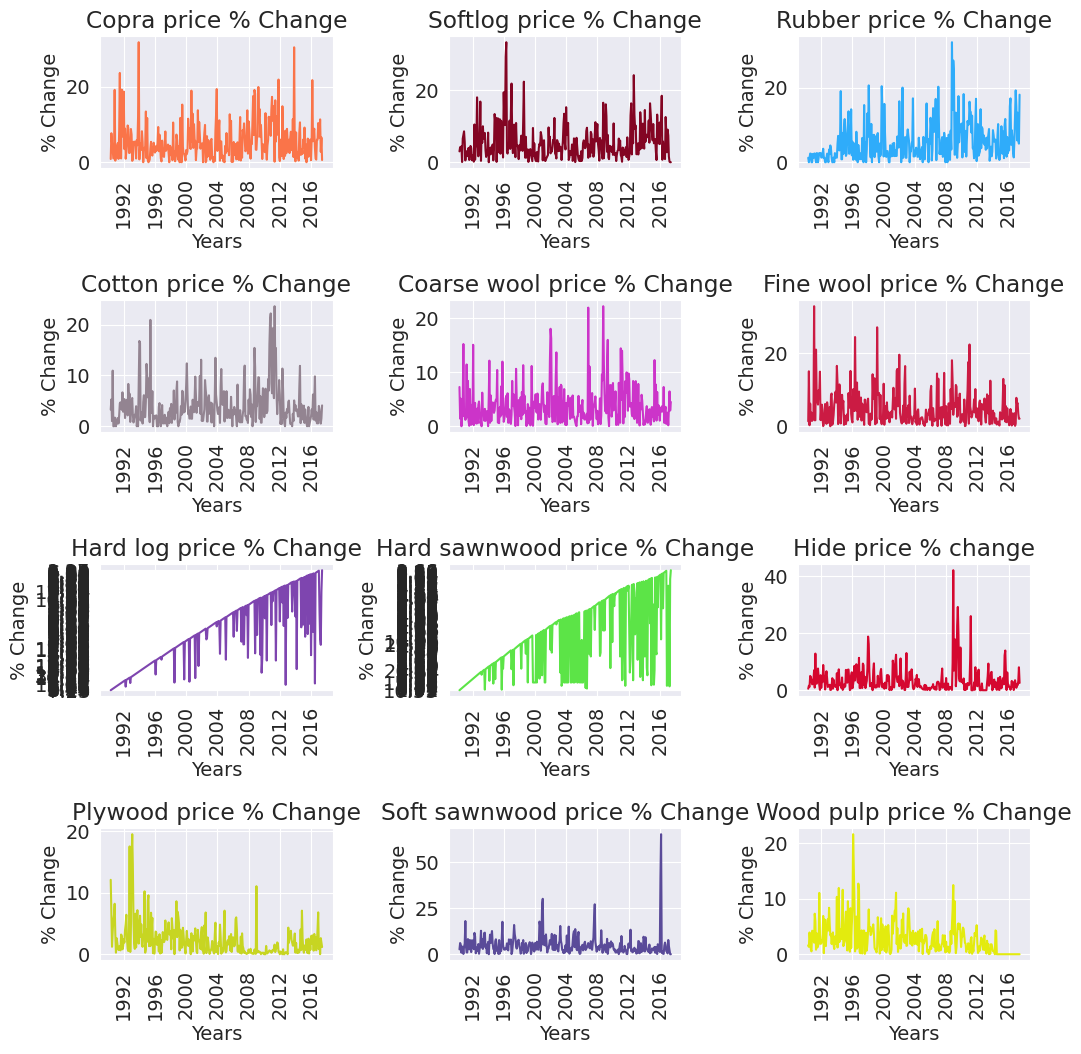

In [93]:
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
for i in range(len(changelist)):

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.plot(df[changelist[i]],c=color)
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')
    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

* Podemos ver que a maior porcentagem de mudança, em mais de 60 para madeira serrada macia (`Soft sawnwood price`).
* E a menor porcentagem de mudança é para madeira compensada (`Plywood price`) em menos de 20

**Q4: Encontre as matérias-primas com mudança drástica de preço**

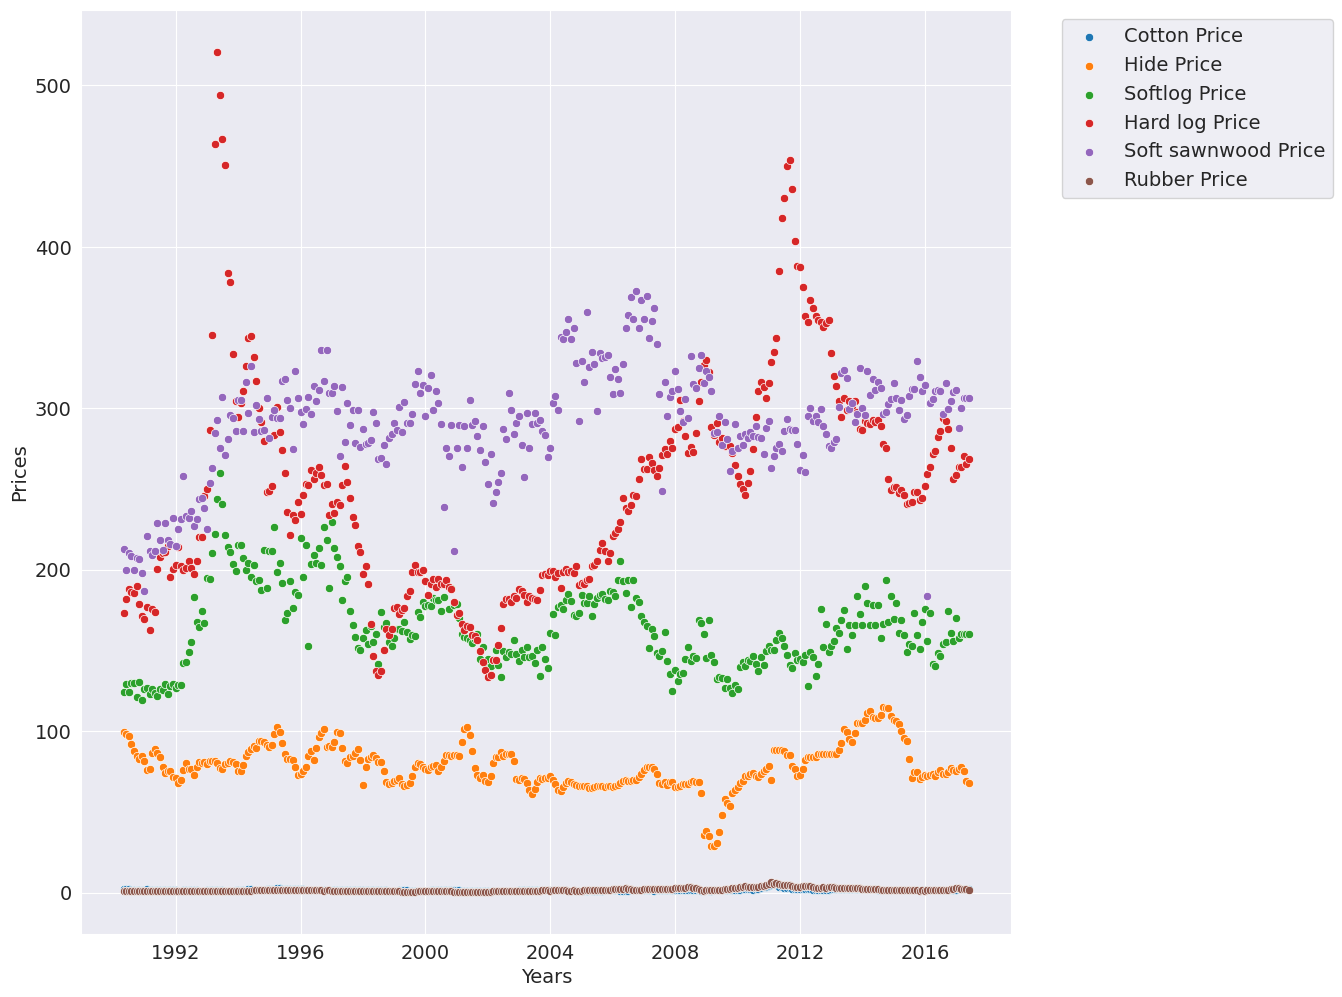

In [94]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')
#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]],x=df.index);
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

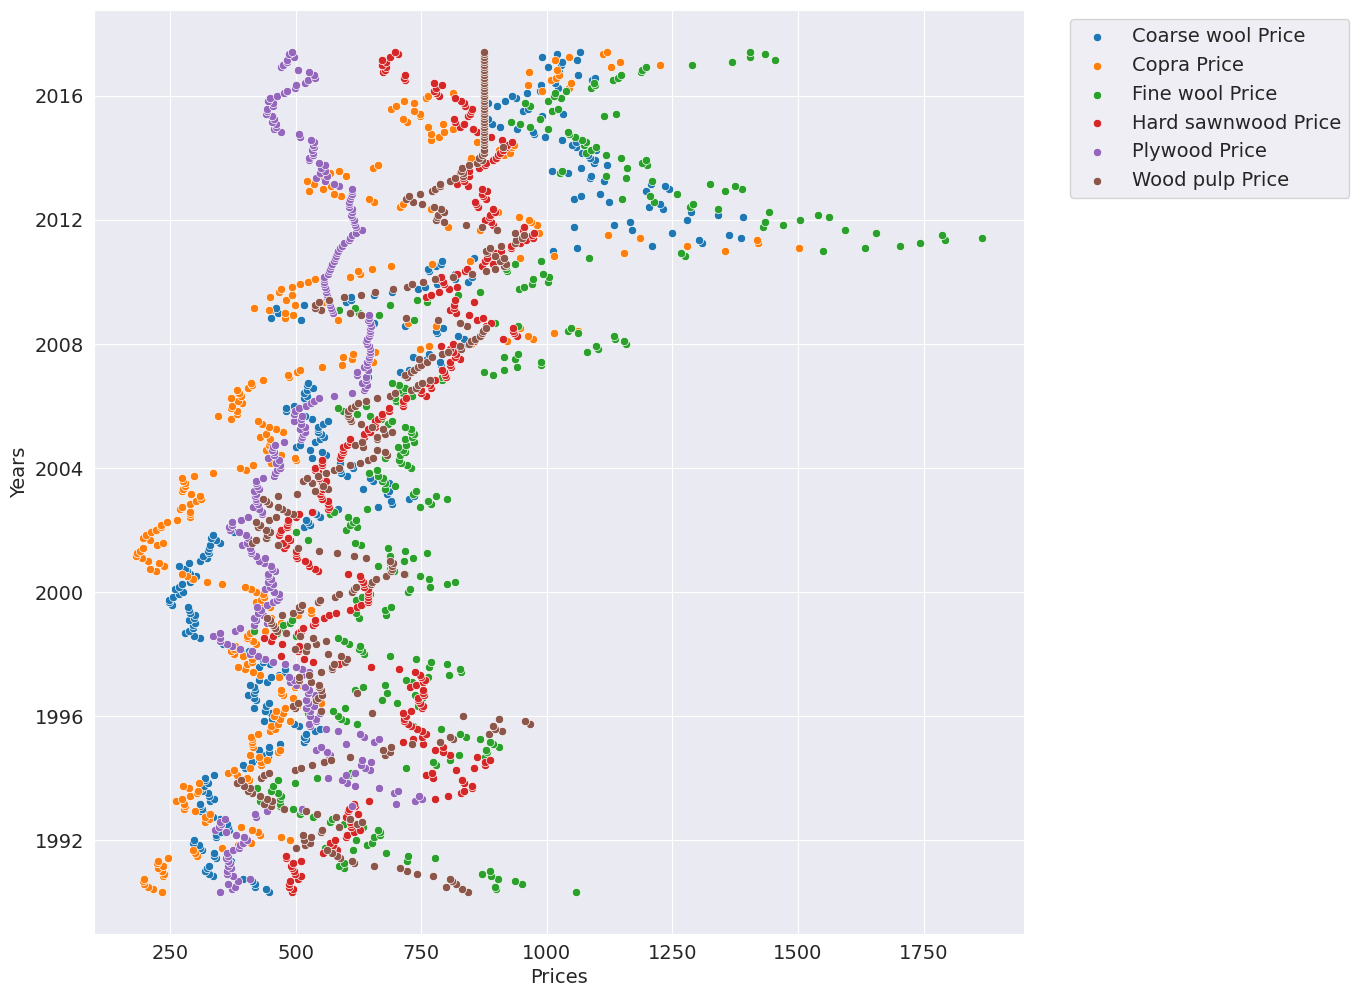

In [95]:
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))

* A mudança de preço é drástica para o preço de "Tora Dura" (`'Hard log Price'`) entre materiais de baixa faixa de preço.
* Entre materiais de alto preço, é o preço de "Lã Fina" (`'Fine wool Price'`).

**Q5: Descobrir a faixa de preço de matérias-primas de baixo preço**

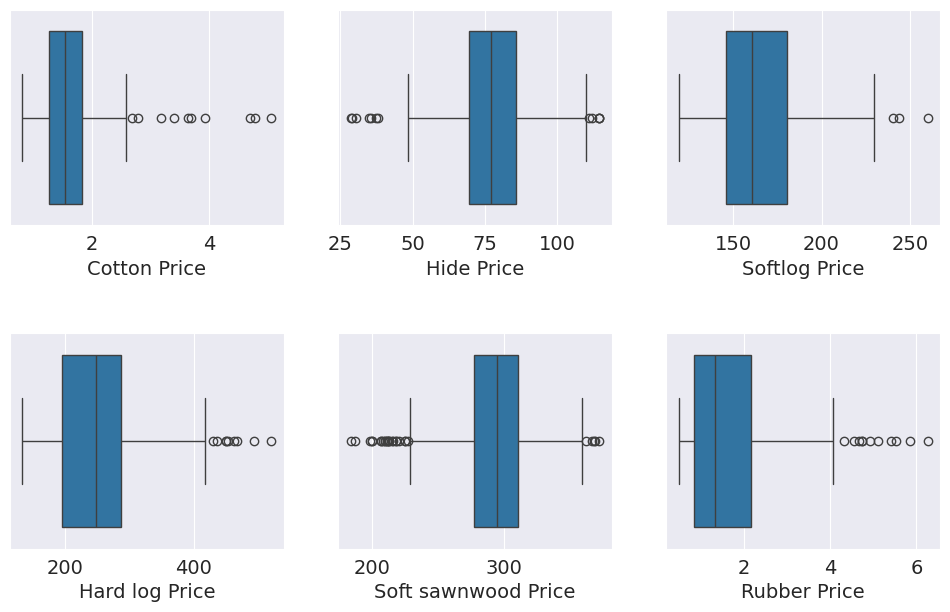

In [96]:
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust( hspace=0.5 )
    sns.boxplot(x=df[lowlist[i]])


**Conclusão:**
* Matérias-Primas de Baixo Preço: Os preços de algodão e borracha estão numa faixa significativamente mais baixa em comparação com os outros materiais.
* Observações de Outliers: Os outliers devem ser investigados para determinar se representam erro de dados ou variações reais no mercado.

# Decomposição Sazonal

Com os dados em formato de série temporal, vamos aplicar uma técnica de decomposição de séries temporais (para identificar tendências, sazonalidade e resíduos).
Vamos criar e analisar esses quatro gráficos em conjunto, para obter uma compreensão muito mais profunda da dinâmica dos preços da lã grossa, o que é essencial para tomar decisões informadas no mercado agrícola.

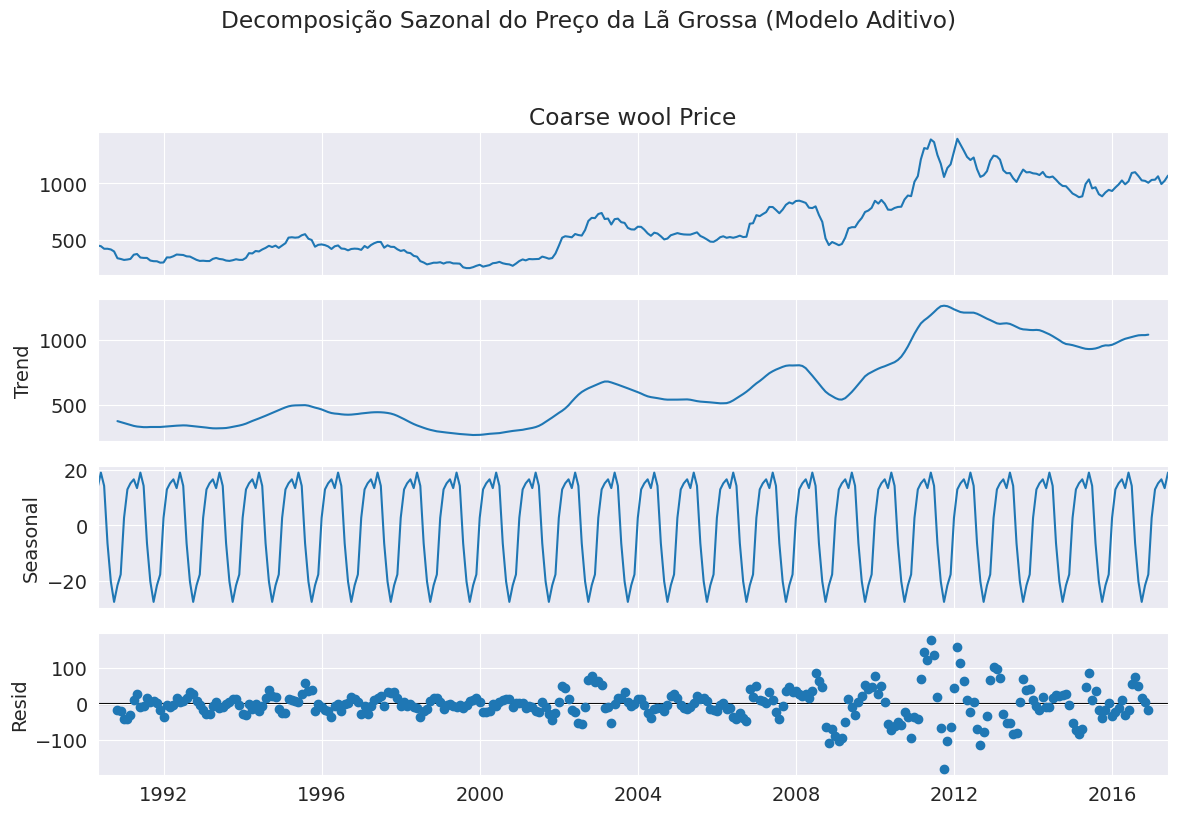

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Vamos usar 'Coarse wool Price' como exemplo
time_series = df['Coarse wool Price']

# Selecionar a série temporal para decomposição
decomposition = seasonal_decompose(time_series, model='additive', period=12)

# Vamos plotar os componentes da decomposição
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.suptitle('Decomposição Sazonal do Preço da Lã Grossa (Modelo Aditivo)', y=1.02) # Ajusta o título para não sobrepor
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout para o título
plt.show()

# Podemos cessar os componentes individualmente
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid




**Conclusão:**

* Os gráficos oferecem uma visão clara sobre o comportamento do preço da lã grossa ao longo do tempo, incluindo tendências gerais, sazonalidades e a adequação do modelo utilizado na análise.
* O modelo parece capturar bem os padrões nos dados.

**Ampliando para ver melhor os meses do Ciclo Sazonal:**

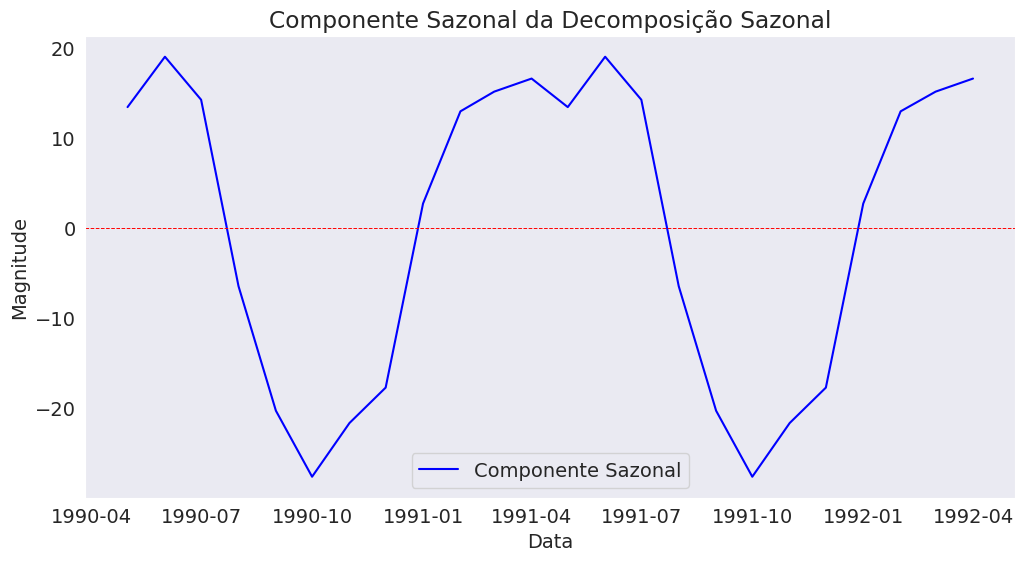

In [99]:
# Extraindo a componente sazonal
seasonal =seasonal.head(24)

# Criar um gráfico
plt.figure(figsize=(12, 6))
plt.plot(seasonal, color='blue', label='Componente Sazonal')
plt.title('Componente Sazonal da Decomposição Sazonal')
plt.xlabel('Data')
plt.ylabel('Magnitude')
plt.axhline(0, color='red', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid()
plt.show()

**Conclusão:**

* Podemos ver com mais claridade que nos meses de Setembro/Outubro se dá a maior baixa do preço da Lã grossa.
* E o maior pico de alta se dá ons meses de Junho/Julho.

##Inferências e Conclusão##
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* Alta e baixa porcentagem de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor
* Vimos como podemos entender com mais profundidade os movimentos dos preços dos ativos para tomar decisões informadas no mercado agrícola
* Podemos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.

##Trabalho futuro##
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
